In [8]:
import numpy as np
import pandas as pd

In [30]:
train_df = pd.read_csv("data\sign_mnist_train\sign_mnist_train.csv")
test_df = pd.read_csv("data\sign_mnist_test\sign_mnist_test.csv")

## Exploration

In [12]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [25]:
train_df.shape

(27455, 785)

Separate out the y variable of the labels in train and test sets. 

In [31]:
y_train = train_df["label"]
X_train = train_df.drop(labels=["label"],axis=1)

y_test = test_df["label"]
X_test = test_df.drop(labels=["label"],axis=1)

y_train.shape,X_train.shape, X_test.shape, y_test.shape

((27455,), (27455, 784), (7172, 784), (7172,))

In [32]:
#from sklearn.preprocessing import LabelBinarizer
#label_binarizer = LabelBinarizer()
#y_train = label_binarizer.fit_transform(y_train)
#y_test = label_binarizer.fit_transform(y_test)

Check label distributions between train and test sets

[Text(0.5, 1.0, 'Test Label Distribution')]

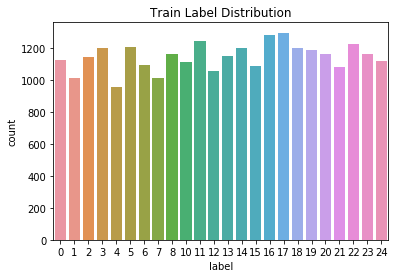

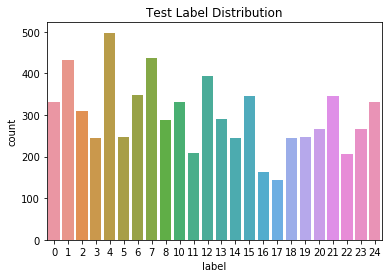

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(y_train).set(title='Train Label Distribution')
plt.figure()
sns.countplot(y_test).set(title='Test Label Distribution')

View an example image, C shows a label of 2 which indexed at 0 would match. 

Color exists not sure where it comes from as only provided with a 2d grid of pixels. 

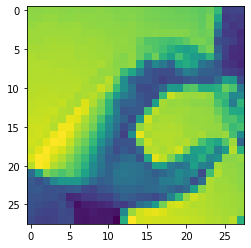

Label:  2


In [44]:
img = X_train.iloc[3].values
reshaped = img.reshape(28,28)
plt.imshow(reshaped)
plt.show()
print("Label: ", y_train.iloc[3])

Check for null or missing values 



In [58]:
X_train.isnull().any().describe() , y_train.isnull().any()

(count       784
 unique        1
 top       False
 freq        784
 dtype: object, False)

### Normalize
Neural networks and activation functions prefer values between 0..1

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Reshape to 3-d for input of our CNN

In [33]:
X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])


num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))



In [22]:
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,
                                    zoom_range = .1,
                                    width_shift_range=.1,
                                    height_shift_range=.1,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(X_train)


In [37]:
model_1 = Sequential([
    Conv2D(26, 3, activation = "relu", input_shape =(28,28,1)),
    Conv2D(26, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(26,3, activation = "relu"),
    Conv2D(26,3, activation = "relu"),
    Flatten(),
    Dense(26, activation ="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 26)        260       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 26)        6110      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 26)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 26)        6110      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 26)          6110      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1664)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)               

In [38]:
history_1 = model_1.fit(train_datagen.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_test, y_test))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 858 steps, validate on 7172 samples
Epoch 1/5
858/858 [==============================] - 55s 65ms/step - loss: 1.5373 - accuracy: 0.5309 - val_loss: 38.3526 - val_accuracy: 0.8263
Epoch 2/5
858/858 [==============================] - 55s 64ms/step - loss: 0.4740 - accuracy: 0.8452 - val_loss: 121.1009 - val_accuracy: 0.7443
Epoch 3/5
858/858 [==============================] - 56s 65ms/step - loss: 0.2692 - accuracy: 0.9124 - val_loss: 41.3016 - val_accuracy: 0.8890
Epoch 4/5
858/858 [==============================] - 55s 65ms/step - loss: 0.1748 - accuracy: 0.9431 - val_loss: 21.0464 - val_accuracy: 0.9465
Epoch 5/5
858/858 [==============================] - 55s 64ms/step - loss: 0.1340 - accuracy: 0.9571 - val_loss: 21.2959 - val_accuracy: 0.9388


In [39]:
print("Accuracy of the model is - " , model_1.evaluate(X_test,y_test)[1]*100 , "%")

7172/7172 [==============================] - 6s 778us/sample - loss: 21.2959 - accuracy: 0.9388
Accuracy of the model is -  93.87897253036499 %


In [40]:
model_1.save('ccn_1')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: ccn_1\assets


INFO:tensorflow:Assets written to: ccn_1\assets


In [43]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

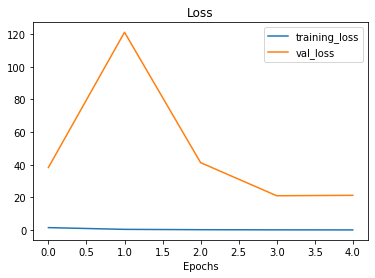

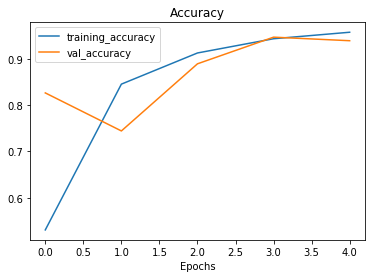

In [44]:
plot_loss_curves(history_1)

In [46]:
from sklearn.metrics import classification_report
predictions = model_1.predict_classes(X_test)
y = test_df["label"]

classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       0.99      0.89      0.94       331
     Class 1       1.00      0.91      0.95       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      0.94      0.97       245
     Class 4       1.00      0.93      0.97       498
     Class 5       1.00      1.00      1.00       247
     Class 6       0.78      1.00      0.88       348
     Class 7       1.00      0.68      0.81       436
     Class 8       0.95      0.98      0.97       288
    Class 10       1.00      1.00      1.00       331
    Class 11       0.91      1.00      0.95       209
    Class 12       0.93      0.91      0.92       394
    Class 13       0.74      1.00      0.85       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       0.79      1.00      0.88       144
    Class 18       0.81    

c:\Users\Kycool13\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


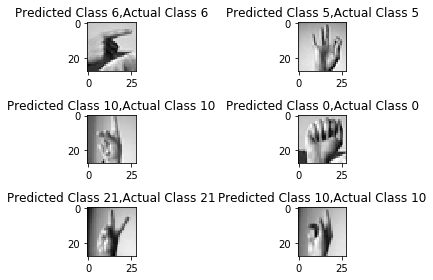

In [47]:
correct = np.nonzero(predictions == y)[0]
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(X_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1